In [1]:
import os, sys
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns 

from os.path import join 
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from IPython.display import display_html

import warnings
warnings.filterwarnings("ignore")

In [2]:
DataPath = r'D:\GitWork\titanic\data'
OutPath  = r'D:\GitWork\titanic\output'

csv_train = 'train.csv'
csv_test  = 'test.csv'

In [3]:
f_abspath = join(DataPath, csv_train)
df_train = pd.read_csv(f_abspath)

display(df_train.head())
display(df_train.info())
# display(df_train.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [4]:
f_abspath = join(DataPath, csv_test)
df_test = pd.read_csv(f_abspath)

display(df_test.head())
display(df_test.info())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

In [5]:
df_data = df_train.append(df_test)
len_train = len(df_train)
print('Num rows for train:', len_train)

display(df_data.head())
# display(df_data.describe())
display(df_data.info())

Num rows for train: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


None

<AxesSubplot:xlabel='x', ylabel='y'>

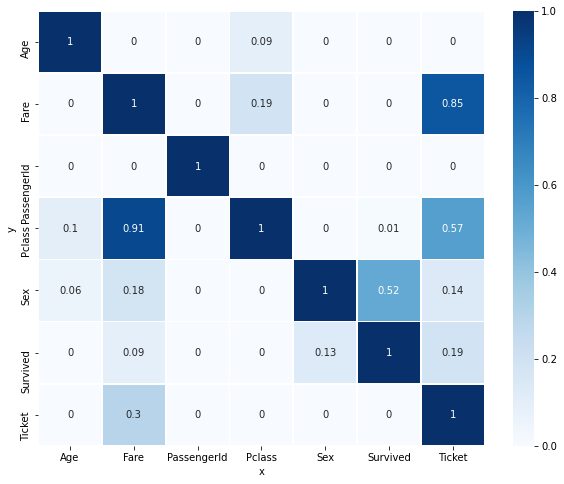

In [6]:
# PPS (Predictive Power Score)
import ppscore as pps # importing ppscore

col_selected = ['PassengerId','Survived', 'Sex', 'Pclass', 'Fare', 'Ticket', 'Age']
df_pps = df_data[col_selected]

fig, ax = plt.subplots(figsize=(10,8)) 
matrix_df = pps.matrix(df_pps)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
matrix_df = matrix_df.apply(lambda x: round(x, 2)) # Rounding matrix_df's values to 0, XX

sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.75, annot=True, ax=ax)

In [7]:
# Preprocess
col_selected = ['PassengerId', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Pclass', 'Ticket', 'Fare', 'Name', 'Embarked']

ds_data = df_train.append(df_test)[col_selected]
display(ds_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Sex          1309 non-null   object 
 3   Age          1046 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Name         1309 non-null   object 
 10  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


None

In [8]:
# For Sex
le_sex = LabelEncoder()
ds_data['SexCode'] = le_sex.fit_transform(ds_data.Sex)
display(ds_data.head())

,PassengerId,Survived,Sex,Age,SibSp,Parch,Pclass,Ticket,Fare,Name,Embarked,SexCode
0,1,0.0,male,22.0,1,0,3,A/5 21171,7.2500,"Braund, Mr. Owen Harris",S,1
1,2,1.0,female,38.0,1,0,1,PC 17599,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,0
2,3,1.0,female,26.0,0,0,3,STON/O2. 3101282,7.9250,"Heikkinen, Miss. Laina",S,0
3,4,1.0,female,35.0,1,0,1,113803,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S,0
4,5,0.0,male,35.0,0,0,3,373450,8.0500,"Allen, Mr. William Henry",S,1


In [9]:
# For Fare

# Fill null value
pid_list = ds_data[ds_data.Fare.isnull()]['PassengerId'].tolist()
display(ds_data.loc[ds_data.PassengerId.isin(pid_list)])

ds_data.Fare.fillna(ds_data.Fare.mean().round(3), inplace=True)
display(ds_data.loc[ds_data.PassengerId.isin(pid_list)])

# Slice fare to five ranges
ds_data['FareBin'] = pd.qcut(ds_data.Fare, 5)

le_fare = LabelEncoder()
ds_data['FareBinCode'] = le_fare.fit_transform(ds_data.FareBin)
ds_data.drop(['FareBin'],axis=1, inplace=True)

dict_fare = { le_fare.transform([x])[0]: x for x in le_fare.classes_}
print('Dict fare:'); display(dict_fare)

display(ds_data.head())

,PassengerId,Survived,Sex,Age,SibSp,Parch,Pclass,Ticket,Fare,Name,Embarked,SexCode
152,1044,NaN,male,60.5,0,0,3,3701,NaN,"Storey, Mr. Thomas",S,1


,PassengerId,Survived,Sex,Age,SibSp,Parch,Pclass,Ticket,Fare,Name,Embarked,SexCode
152,1044,NaN,male,60.5,0,0,3,3701,33.295,"Storey, Mr. Thomas",S,1


Dict fare:


{0: Interval(-0.001, 7.854, closed='right'),
 1: Interval(7.854, 10.5, closed='right'),
 2: Interval(10.5, 21.679, closed='right'),
 3: Interval(21.679, 41.579, closed='right'),
 4: Interval(41.579, 512.329, closed='right')}

,PassengerId,Survived,Sex,Age,SibSp,Parch,Pclass,Ticket,Fare,Name,Embarked,SexCode,FareBinCode
0,1,0.0,male,22.0,1,0,3,A/5 21171,7.2500,"Braund, Mr. Owen Harris",S,1,0
1,2,1.0,female,38.0,1,0,1,PC 17599,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,0,4
2,3,1.0,female,26.0,0,0,3,STON/O2. 3101282,7.9250,"Heikkinen, Miss. Laina",S,0,1
3,4,1.0,female,35.0,1,0,1,113803,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S,0,4
4,5,0.0,male,35.0,0,0,3,373450,8.0500,"Allen, Mr. William Henry",S,1,1


In [10]:
# For Connected_Survival

ds_data['FamilySize'] = ds_data.SibSp + ds_data.Parch + 1
ds_data['Connected_Survival'] = 0.5

for tk, df_grp in ds_data.groupby('Ticket'):
    if (len(df_grp) > 1):
        for idx, row in df_grp.iterrows():
            smax = df_grp.drop(idx).Survived.max()
            smin = df_grp.drop(idx).Survived.min()
            passId = row.PassengerId
            if (smax == 1.0):
                ds_data.loc[ds_data.PassengerId == passId, 'Connected_Survival'] = 1
            elif (smax == 0.0):
                ds_data.loc[ds_data.PassengerId == passId, 'Connected_Survival'] = 0

display(ds_data.head())
                
# print
print('People keep same ticket: {}'.format(len(ds_data)))

num_conn = ds_data[ds_data.Connected_Survival != 0.5]['Connected_Survival'].count()
print('People have connected infomation: {}'.format(num_conn))

ct = pd.crosstab(ds_data.Connected_Survival, ds_data.Survived, margins = True, margins_name='Total')
ct['Rate_S1'] = (ct[1]/ ct.Total).round(3)
display(ct)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Pclass,Ticket,Fare,Name,Embarked,SexCode,FareBinCode,FamilySize,Connected_Survival
0,1,0.0,male,22.0,1,0,3,A/5 21171,7.2500,"Braund, Mr. Owen Harris",S,1,0,2,0.5
1,2,1.0,female,38.0,1,0,1,PC 17599,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,0,4,2,0.5
2,3,1.0,female,26.0,0,0,3,STON/O2. 3101282,7.9250,"Heikkinen, Miss. Laina",S,0,1,1,0.5
3,4,1.0,female,35.0,1,0,1,113803,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S,0,4,2,0.0
4,5,0.0,male,35.0,0,0,3,373450,8.0500,"Allen, Mr. William Henry",S,1,1,1,0.5


People keep same ticket: 1309
People have connected infomation: 496


Survived,0.0,1.0,Total,Rate_S1
Connected_Survival,,,,
0.0,110,32,142,0.225
0.5,384,163,547,0.298
1.0,55,147,202,0.728
Total,549,342,891,0.384


In [11]:
# For Title_Minor

pattern1 = r'(^[A-Za-z \'-]+)\,'
pattern2 = r'[A-Za-z]+\.'
pattern3 = r'\([A-Za-z \'\"\.-]+\)\"?'

# col_parts = ['Name_P1','Name_P2','Name_P3','Name_Rest']
# for x in col_parts: ds_data[x] = None
ds_data['Title'] = None

for idx, row in ds_data.iterrows():
    instr = row.Name
    
    match = re.findall(pattern1, instr)
    str1 = match[0].strip() if match else ''
    if len(str1) > 0: 
        instr = instr.replace(str1+',', '').strip()
    
    match = re.findall(pattern3, instr)
    str3 = match[0].strip() if match else ''
    if len(str3) > 0: 
        instr = instr.replace(str3, '').strip()
        
    match = re.findall(pattern2, instr)
    str2 = match[0].replace('.', '').strip() if match else ''
    
    str4 = instr.replace(str2+'.', '').strip() if len(str2)>0 else ''
    
    mask = (ds_data.PassengerId == row.PassengerId)
    ds_data.loc[mask, 'Title'] = str2
    # ds_data.loc[mask, col_parts] = [str1, str2, str3, str4]

display(ds_data.head())

# ds_data['Title'] = ds_data.Name_P2
print('Titles:', sorted(ds_data.Title.unique()))

mask = ['Capt','Col','Don','Dona','Dr','Jonkheer','Major','Rev','Sir']
ds_data.Title.replace(mask, 'Rare', inplace=True)
ds_data.Title.replace(['Lady','Countess'], 'Mrs', inplace=True)
ds_data.Title.replace(['Mlle', 'Ms', 'Mme'], 'Miss', inplace=True)

dict_tiage = ds_data.groupby('Title')['Age'].median().to_dict()
display(dict_tiage)

# le_age = LabelEncoder()
# ds_data['Title_Code'] = le_age.fit_transform(ds_data.Title)

# Fill null age based on title
ds_data['Ti_Age'] = ds_data.Age
for k in dict_tiage:
    ds_data.loc[ds_data.Ti_Age.isnull(), 'Ti_Age'] = dict_tiage[k]
# display(ds_data)

# Create Ti_Minor column to distinguish the age is less than 16
ds_data['Ti_Minor'] = ((ds_data.Ti_Age < 16) * 1)
display(ds_data.head())

,PassengerId,Survived,Sex,Age,SibSp,Parch,Pclass,Ticket,Fare,Name,Embarked,SexCode,FareBinCode,FamilySize,Connected_Survival,Title
0,1,0.0,male,22.0,1,0,3,A/5 21171,7.2500,"Braund, Mr. Owen Harris",S,1,0,2,0.5,Mr
1,2,1.0,female,38.0,1,0,1,PC 17599,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,0,4,2,0.5,Mrs
2,3,1.0,female,26.0,0,0,3,STON/O2. 3101282,7.9250,"Heikkinen, Miss. Laina",S,0,1,1,0.5,Miss
3,4,1.0,female,35.0,1,0,1,113803,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S,0,4,2,0.0,Mrs
4,5,0.0,male,35.0,0,0,3,373450,8.0500,"Allen, Mr. William Henry",S,1,1,1,0.5,Mr


Titles: ['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir']


{'Master': 4.0, 'Miss': 22.0, 'Mr': 29.0, 'Mrs': 35.5, 'Rare': 48.0}

,PassengerId,Survived,Sex,Age,SibSp,Parch,Pclass,Ticket,Fare,Name,Embarked,SexCode,FareBinCode,FamilySize,Connected_Survival,Title,Ti_Age,Ti_Minor
0,1,0.0,male,22.0,1,0,3,A/5 21171,7.2500,"Braund, Mr. Owen Harris",S,1,0,2,0.5,Mr,22.0,0
1,2,1.0,female,38.0,1,0,1,PC 17599,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,0,4,2,0.5,Mrs,38.0,0
2,3,1.0,female,26.0,0,0,3,STON/O2. 3101282,7.9250,"Heikkinen, Miss. Laina",S,0,1,1,0.5,Miss,26.0,0
3,4,1.0,female,35.0,1,0,1,113803,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S,0,4,2,0.0,Mrs,35.0,0
4,5,0.0,male,35.0,0,0,3,373450,8.0500,"Allen, Mr. William Henry",S,1,1,1,0.5,Mr,35.0,0


In [12]:
# For 'Embarked'
print('Totle rows:', len(ds_data))
display(ds_data.Embarked.describe())

pid_list = ds_data[ds_data.Embarked.isnull()]['PassengerId'].tolist()
display(ds_data.loc[ds_data.PassengerId.isin(pid_list)])

tk_list = ds_data[ds_data.Ticket.str.contains("1135")]['PassengerId'].tolist()
df_tmp = ds_data.loc[ds_data.PassengerId.isin(tk_list)] 
# display(df_tmp)

disp = df_tmp[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
display(disp)

# The other tickets which have same first 4 numbers 
# when embarked from port 'S' have 0.4 survival rate, 
# remainder is 0.
ds_data.Embarked.fillna('S', inplace=True)

le_emb = LabelEncoder()
ds_data['EmbarkedCode'] = le_emb.fit_transform(ds_data.Embarked)
display(le_emb.classes_)

display(ds_data.info())

Totle rows: 1309


count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

,PassengerId,Survived,Sex,Age,SibSp,Parch,Pclass,Ticket,Fare,Name,Embarked,SexCode,FareBinCode,FamilySize,Connected_Survival,Title,Ti_Age,Ti_Minor
61,62,1.0,female,38.0,0,0,1,113572,80.0,"Icard, Miss. Amelie",NaN,0,4,1,1.0,Miss,38.0,0
829,830,1.0,female,62.0,0,0,1,113572,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",NaN,0,4,1,1.0,Mrs,62.0,0


,Embarked,Survived
1,S,0.4
0,C,0.0


array(['C', 'Q', 'S'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         1309 non-null   int64  
 1   Survived            891 non-null    float64
 2   Sex                 1309 non-null   object 
 3   Age                 1046 non-null   float64
 4   SibSp               1309 non-null   int64  
 5   Parch               1309 non-null   int64  
 6   Pclass              1309 non-null   int64  
 7   Ticket              1309 non-null   object 
 8   Fare                1309 non-null   float64
 9   Name                1309 non-null   object 
 10  Embarked            1309 non-null   object 
 11  SexCode             1309 non-null   int32  
 12  FareBinCode         1309 non-null   int32  
 13  FamilySize          1309 non-null   int64  
 14  Connected_Survival  1309 non-null   float64
 15  Title               1309 non-null   object 
 16  Ti_Age 

None

In [13]:
# Training
len_train = len(df_train)
ds_train = ds_data[:len_train]

col_selected = ['SexCode', 'Pclass', 'FareBinCode', 'Connected_Survival', 'Ti_Minor']
inps = ds_train[col_selected]
lbls = ds_train.Survived

param_grid = {
    'random_state': [1, 2],
    'min_samples_split': [10, 20, 40],
    'n_estimators': [100, 250, 500, 750]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
gs = GridSearchCV(
    estimator = rf, 
    param_grid = param_grid,
    scoring='accuracy',
    cv = 3, 
    n_jobs = -1 
)

gs = gs.fit(inps, lbls)

scores = gs.cv_results_['mean_test_score']
best_score = np.max(scores)
print('Best score:', best_score)

best_params = gs.best_params_
print('\nBest params:', best_params)

# best_estimator = gs.best_estimator_
# print(); print(best_estimator)

Best score: 0.830527497194164
\Best params: {'min_samples_split': 40, 'n_estimators': 100, 'random_state': 1}


In [17]:
# Training and predict
len_train = len(df_train)
ds_train = ds_data[:len_train]

# Training
col_selected = ['SexCode', 'Pclass', 'FareBinCode', 'Connected_Survival', 'Ti_Minor']
inps = ds_train[col_selected]
lbls = ds_train.Survived

model = RandomForestClassifier(random_state=2, n_estimators=250, min_samples_split=20, oob_score=True)

# random_state = best_params['random_state']
# n_estimators = best_params['n_estimators']
# min_samples_split = best_params['min_samples_split']

# model = RandomForestClassifier(
#     random_state = random_state, 
#     n_estimators = n_estimators, 
#     min_samples_split = min_samples_split, 
#     oob_score = True
# )

model.fit(inps, lbls)
print('oob score :%f' %(model.oob_score_))

oob score :0.838384


In [18]:
# Prediction
ds_test  = ds_data[len_train:]
inps = ds_test[col_selected]

ds_test['Survived'] = model.predict(inps).astype(int)
display(ds_test.head())

# Save predict result to xlsx
f_abspath = join(OutPath, 'Submission_v4.csv')
features = ['PassengerId', 'Survived']
ds_test[features].to_csv(f_abspath, index=False)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Pclass,Ticket,Fare,Name,Embarked,SexCode,FareBinCode,FamilySize,Connected_Survival,Title,Ti_Age,Ti_Minor,EmbarkedCode
0,892,0,male,34.5,0,0,3,330911,7.8292,"Kelly, Mr. James",Q,1,0,1,0.5,Mr,34.5,0,1
1,893,1,female,47.0,1,0,3,363272,7.0000,"Wilkes, Mrs. James (Ellen Needs)",S,0,0,2,0.5,Mrs,47.0,0,2
2,894,0,male,62.0,0,0,2,240276,9.6875,"Myles, Mr. Thomas Francis",Q,1,1,1,0.5,Mr,62.0,0,1
3,895,0,male,27.0,0,0,3,315154,8.6625,"Wirz, Mr. Albert",S,1,1,1,0.5,Mr,27.0,0,2
4,896,1,female,22.0,1,1,3,3101298,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",S,0,2,3,1.0,Mrs,22.0,0,2


In [16]:
print('done')

done
